# MPI

MPI (Message Passing Interface) is a standardized and portable message-passing standard designed to function on parallel computing architectures.

Each CPI has ALU (arifmetical logic u) and memory. All computers should be connected to each other.

How the communicate?

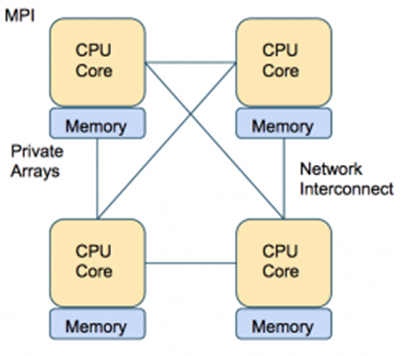

The MPI standard includes point-to-point message-passing, collective communications, group and communicator concepts, process topologies, environmental management, process creation and management, one-sided communications, extended collective operations, external interfaces, I/O, some miscellaneous topics, and multiple tool interfaces. Language bindings for C and Fortran are defined.

**Realisations**

- MPICH from Argonne National Laboratory
- LAM/MPI from Ohio Supercomputer Center
- Open MPI (not to be confused with OpenMP) was formed by the merging FT-MPI, LA-MPI, LAM/MPI, and PACX-MPI
- MESH-MPI from MESH-Technologies
- IBM MPI
- Intel MPI
- ...

**How super-computer works?**

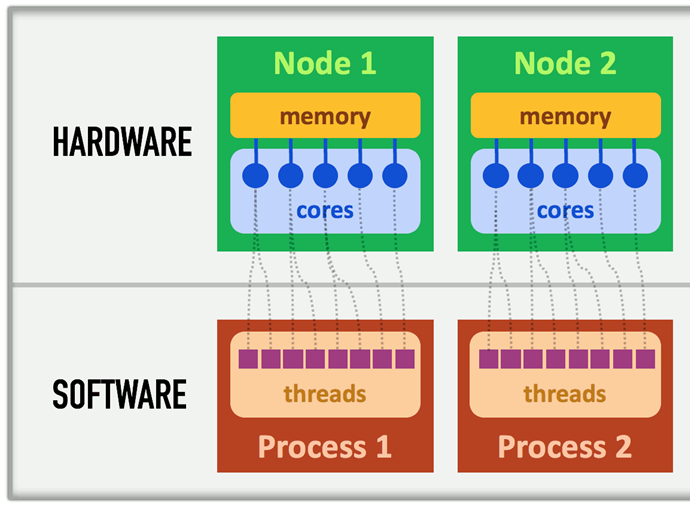

Cpu can have more than 128 cores

Each process can be divided by threads.

1. `#include "mpi.h"`

2. Starting with initilialisation which is called with arguments that are the same as main:

`MPI_INIT(&argc, &argv)` - initialisation, starting parallel part

3. MPI creating `MPI Communicator`, which create `MPI_COMM_WORLD` - describing a group of processes

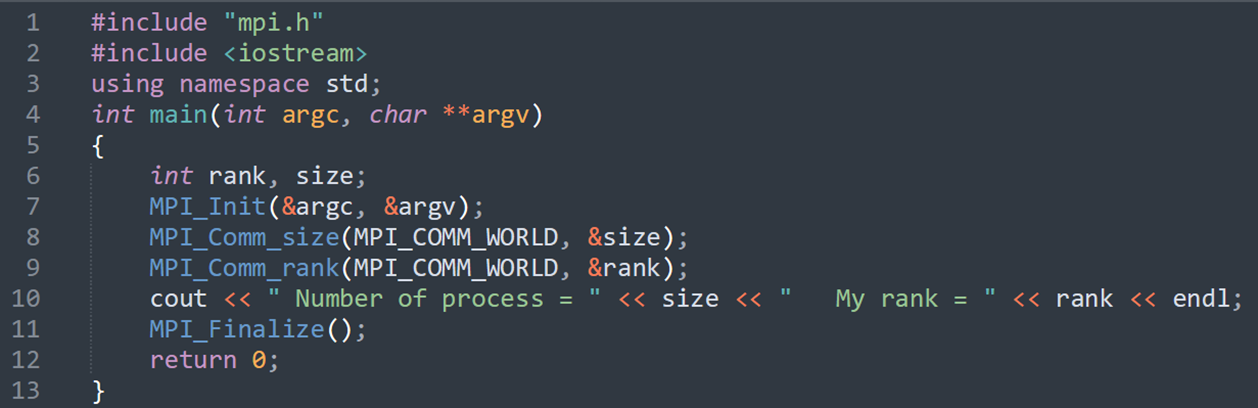

4. `MPI_Comm_size(MPI_COMM_WORLD, size)` - total number of process

5. `MPI_Comm_rank(MPI_COMM_WORLD, rank)` - each process has it is own rank and size

Each process has `rank` and `size` and this variables are private for every process!

6. `MPI_Finalise()` - end of parallel part

**Message**

Message consist:

- data
    - address of first element
    - number of transferred elements
    - type of transferred elements
    > `a[00], 3, MPI_INT`
- service information

## Base MPI Point-to-Point Communication

### 1. `int MPI_Send`

```python
int MPI_Send - call the postman and bring stuff and go to another process

(
    void* buf, // the address of the beginning of the transferred data location
    int count, // the number of elements sent
    MPI_Datatype datatype, // the typeof elements sent
    int dest, // the number of receiving process (in communicator comm) - for whome we want to text a message
    int tag, // name of text message, identifier
    MPI_Comm comm 
)
```
Example

> `int MPI_Send(&a[0], 3, MPI_INT, 1 (first process), 1, MPI_Comm_world)`


### 2. `int MPI_Recv`

The similar to the send operation, but we can recieve information

```python
int MPI_Recv(
    void* buf, // the address of the beginning of the transferred data location
    int count, // the number of elements sent
    MPI_Datatype datatype, // the typeof elements sent
    int source, // number of the sending process (in communicator comm)
    int tag, // name of text message, identifier
    MPI_Comm comm, // communicator
    MPI_Status *status // message attibutes - see, if all elements or not come to process
)
```

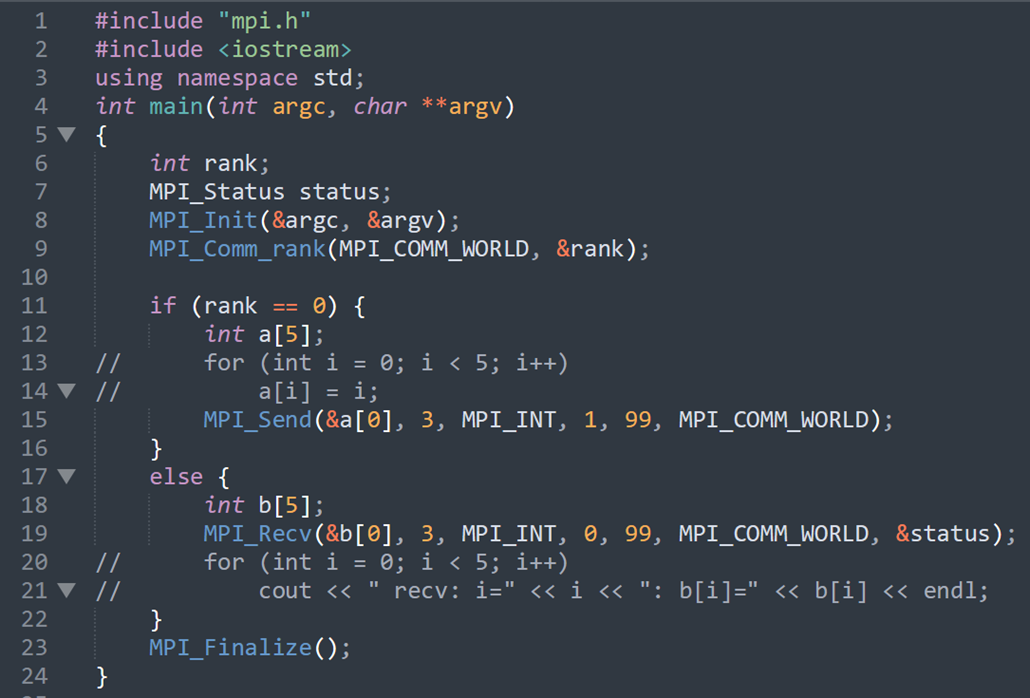

Part of code executed on zero process and no one else executing this part!

All others different problem.

We want to send $3$ numbers to process 1. 

`b[4]` - wasn't initialise 

> **WE SHOULD BIGGER RECIEVE THAN SENDING**

RECIEVE = 5 < SEDNING = 3

**Blocking operation - MPI_Send and MPI_Recv**

```cpp
MPI_Send 	standard regime		(independent start- auto stop)
MPI_Bsend 	buffered regime		(independent start- independent stop)
MPI_Ssend 	synchronous regime	(independent start- depended stop)
MPI_Rsend 	ready regime			(depended start- independent stop)
```

If message is big, we are waiting, until `MPI_Recv` -> Transfer the message

If small, the postmen can take the message and hold it  - **buffering**

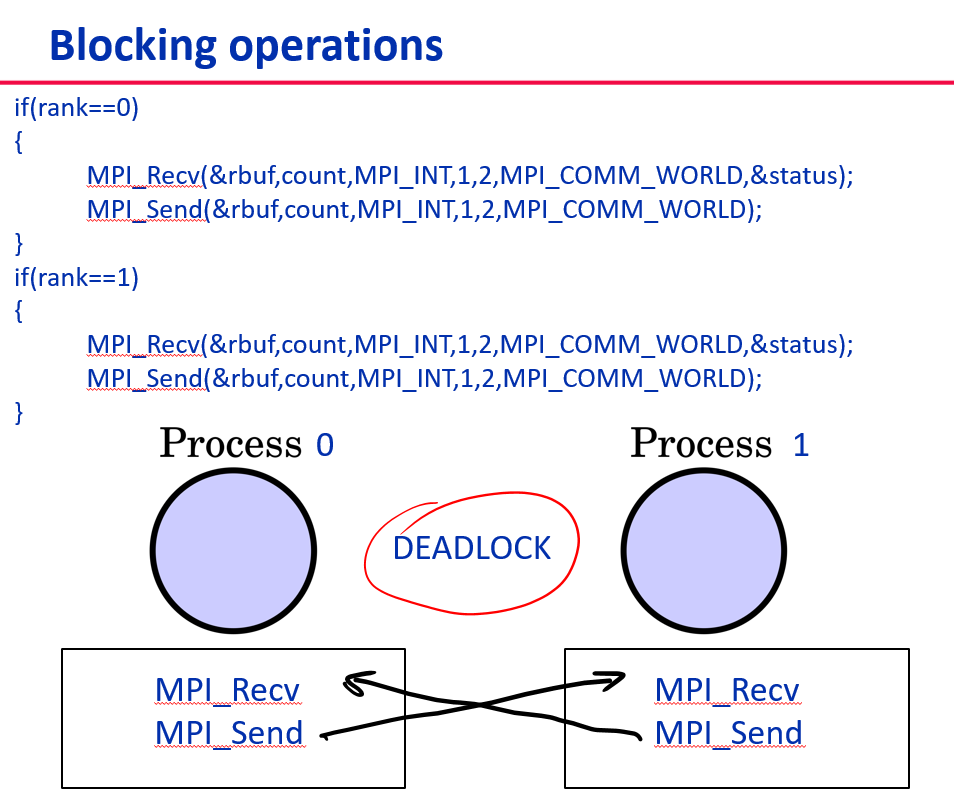

Cause every process recieve

**Non-blocking operations**

```cpp
int MPI_Isend( // mp immedialty send
void* buf, // the addressof the beginning of transffereed data location
int count, //the number of elements sent 
MPI_Datatype datatype, // the type of elements sent
int dest, //is the number pf the receiving process
int tag, //message identifier
MPI_Comm comm, //communicator
MPI_Request *request // request identificator
)
```

Immideatly sending information

```python
MPI_Isend 	standard regime		
MPI_Ibsend 	buffered regime		
MPI_Issend 	synchronous regime	
MPI_Irsend 	ready regime

https://iamsorush.com/posts/mpi-send-types/
```

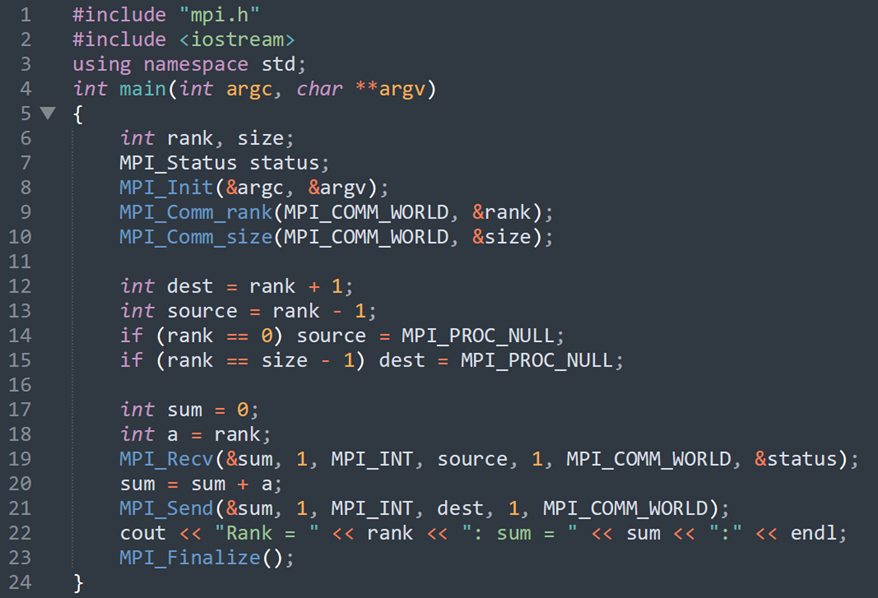

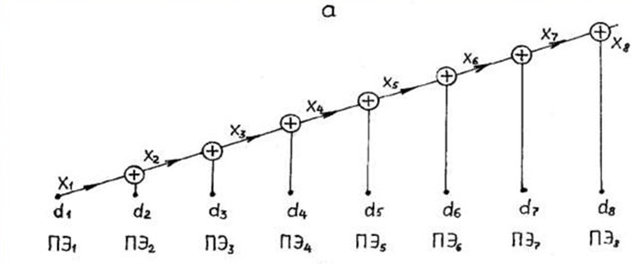

- **MPI_Barrier()** -if one process have come to barrier - syncronization

- **MPI_Bcast()** - broadcast array to every process

- **MPI_Gather()** - sending each part of informaton to one array

- **MPI_Allgather()** - sending each part of informaton to one array and send to every process

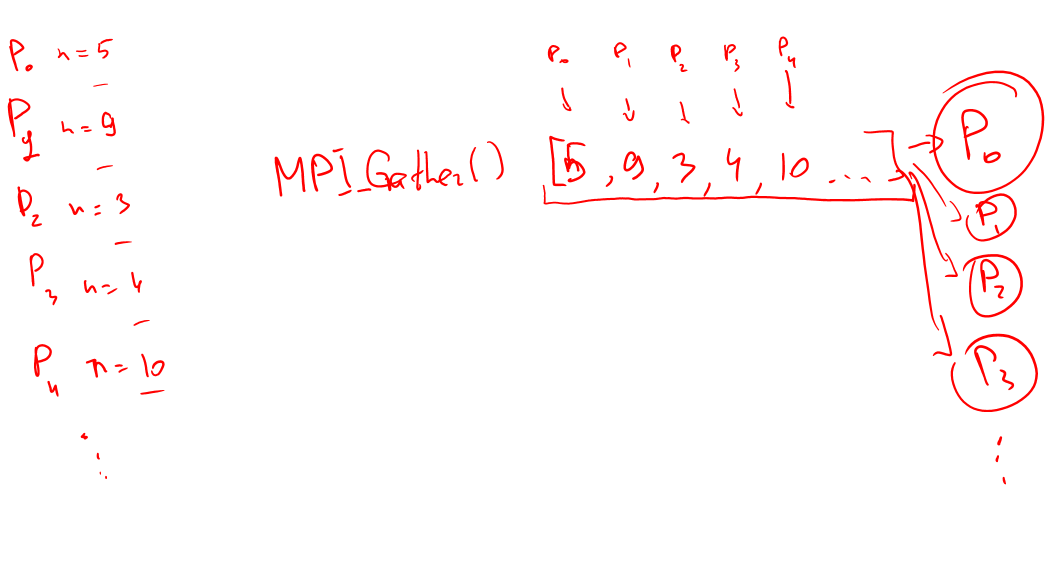

- **MPI_Scatter()** - 

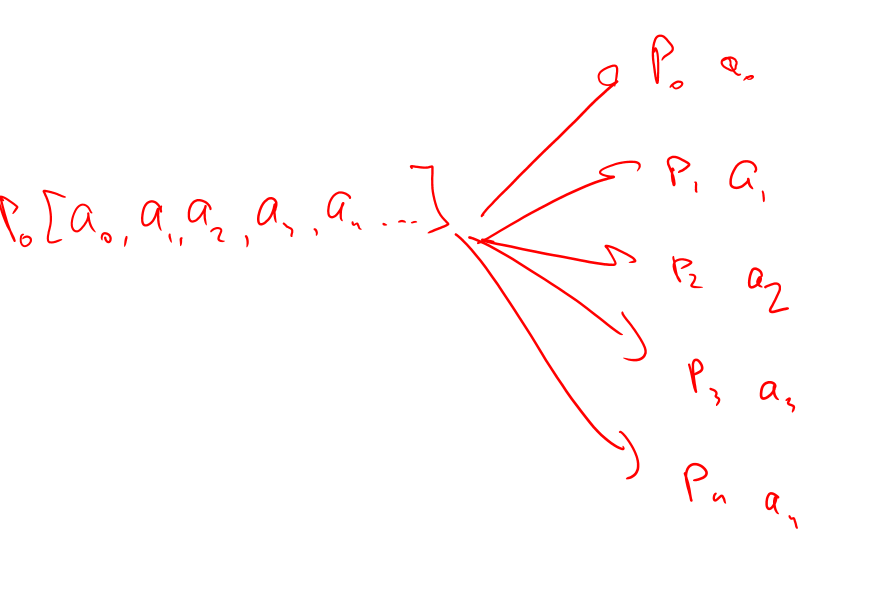